In [1]:
from data_gen import *
from NN_map import *

import matplotlib.pyplot as plt

## 2D visualizations of source and target distributions

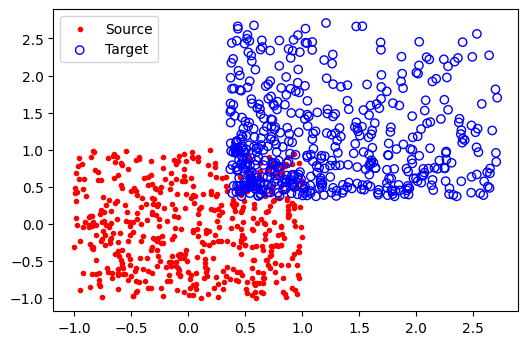

In [2]:
### P = Unif(-1,1)^2
### T(x) = exp(x) coordinatewise
n = 500
dim = 2
source = sample_uniform(n,dim)
target = OT_exp(source)

fig = plt.figure(dpi=100)
plt.scatter(source[:,0],source[:,1],c='r',marker='.',label='Source')
plt.scatter(target[:,0],target[:,1],edgecolor='b',facecolor='none',label='Target')
plt.legend()
plt.show()

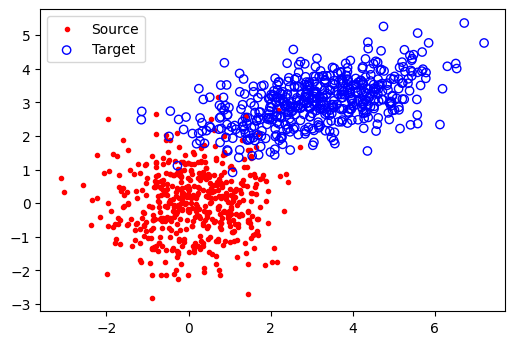

In [3]:
### P = N(0,A)
### Q = N(b,B)

n = 500
dim = 2
A = np.eye(dim)
b = np.ones(dim,)*3
B = np.array([[2,0.5],[0.5,0.5]])

source_g2g = sample_mvn(n,A)
G2G_matrix = G2G_map(A,B)
target_g2g = (G2G_matrix @ source_g2g.T).T + b

fig = plt.figure(dpi=100)
plt.scatter(source_g2g[:,0],source_g2g[:,1],c='r',marker='.',label='Source')
plt.scatter(target_g2g[:,0],target_g2g[:,1],edgecolor='b',facecolor='none',label='Target')
plt.legend()
plt.show()

# Visualizing 1NN map estimator

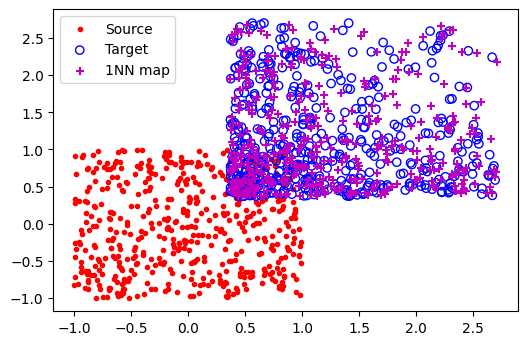

In [4]:
n = 2000
n_new = 500
dim = 2

source = sample_uniform(n,dim)
###need to resample source points to ensure targets are independent from source
source_copy = sample_uniform(n,dim) 
target = OT_exp(source_copy)

#new samples to test estimators
x = sample_uniform(n_new,dim)
y_x = OT_exp(x)

G0 = OT_0(source,target)
nn_x = NNEstimator(x,source,target,G0)

fig = plt.figure(dpi=100)
plt.scatter(x[:,0],x[:,1],c='r',marker='.',label='Source')
plt.scatter(y_x[:,0],y_x[:,1],edgecolor='b',facecolor='none',label='Target')
plt.scatter(nn_x[:,0],nn_x[:,1],c='m',marker='+',label='1NN map')
plt.legend()
plt.show()

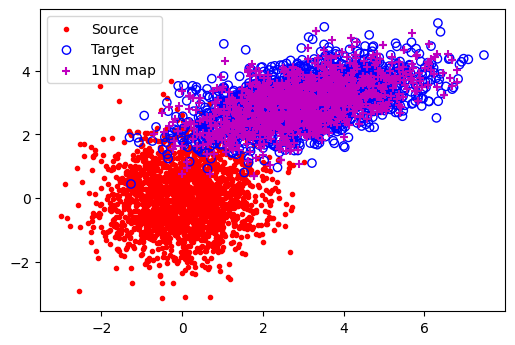

In [5]:
n = 2000
n_new = 500
dim = 2

source_g2g = sample_mvn(n,A)
G2G_matrix = G2G_map(A,B)
###need to resample source points to ensure targets are independent from source
source_g2g_copy = sample_mvn(n,A)
target_g2g = (G2G_matrix @ source_g2g_copy.T).T + b

#new samples to test estimators
x = sample_mvn(n,A)
y_x = (G2G_matrix @ x.T).T + b

G0 = OT_0(source_g2g,target_g2g)
nn_x = NNEstimator(x,source_g2g,target_g2g,G0)

fig = plt.figure(dpi=100)
plt.scatter(x[:,0],x[:,1],c='r',marker='.',label='Source')
plt.scatter(y_x[:,0],y_x[:,1],edgecolor='b',facecolor='none',label='Target')
plt.scatter(nn_x[:,0],nn_x[:,1],c='m',marker='+',label='1NN map')
plt.legend()
plt.show()